## Battle of the Neighborhoods - Week 2

In [195]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install folium
import folium
!pip install lxml
!pip install geocoder
import geocoder

### Scrape Wikipedia for neighborhood data

In [58]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Denver").text

In [59]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Category:Neighborhoods in Denver - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"dac250c3-7377-41b9-9468-1d4948c797ae","wgCSPNonce":!1,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":14,"wgPageName":"Category:Neighborhoods_in_Denver","wgTitle":"Neighborhoods in Denver","wgCurRevisionId":879051027,"wgRevisionId":879051027,"wgArticleId":36608427,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Commons category link is on Wikidata","Geography of Denver","Neighborhoods in Colorado","Denver"],"wgPageConte

In [60]:
# create a list to store neighborhood data
neighborhoodList = []

In [61]:
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

In [95]:
# create a new DataFrame from the list
den_df = pd.DataFrame({"Neighborhood": neighborhoodList})

den_df.drop(den_df.index[[0]], inplace=True)

den_df.head()

,Neighborhood
1,"Alamo Placita, Denver"
2,"Athmar Park, Denver"
3,"Auraria, Denver"
4,"Baker, Denver"
5,"Barnum, Denver"


In [96]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [97]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in den_df["Neighborhood"].tolist() ]

In [98]:
coords

[[39.721070000000054, -104.97521999999998],
 [39.70396000000005, -105.01038999999997],
 [39.745750000000044, -105.00996999999995],
 [39.71117000000004, -104.99208999999996],
 [39.71816000000007, -105.03261999999995],
 [39.70384000000007, -104.94973999999996],
 [39.77666000000005, -105.03956999999997],
 [39.733700000000056, -104.97956999999997],
 [39.892390000000034, -104.95170999999999],
 [39.78741000000008, -105.01755999999995],
 [39.72911000000005, -104.96816999999999],
 [39.717820000000074, -104.94872999999995],
 [39.86379000000005, -104.97787999999997],
 [39.74545000000006, -104.96719999999999],
 [39.74379000000005, -104.94824999999997],
 [39.73526000000004, -104.99057999999997],
 [39.76693000000006, -104.95050999999995],
 [39.76633000000004, -104.96593999999999],
 [39.73359000000005, -104.95000999999996],
 [39.721960000000024, -104.96551999999997],
 [39.74001000000004, -104.99201999999997],
 [39.781960000000026, -104.95909999999998],
 [39.78194000000008, -104.98522999999994],
 [39

In [99]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [100]:
# merge the coordinates into the original dataframe
den_df['Latitude'] = df_coords['Latitude']
den_df['Longitude'] = df_coords['Longitude']

In [106]:
# check the neighborhoods and the coordinates
print(den_df.shape)
den_df

(52, 3)


,Neighborhood,Latitude,Longitude
1,"Alamo Placita, Denver",39.703960,-105.010390
2,"Athmar Park, Denver",39.745750,-105.009970
3,"Auraria, Denver",39.711170,-104.992090
4,"Baker, Denver",39.718160,-105.032620
5,"Barnum, Denver",39.703840,-104.949740
6,"Belcaro, Denver",39.776660,-105.039570
7,"Berkeley, Denver",39.733700,-104.979570
8,"Capitol Hill, Denver",39.892390,-104.951710
9,"Central Park, Denver",39.787410,-105.017560
10,"Chaffee Park, Denver",39.729110,-104.968170


In [119]:
den_df.dropna(inplace=True)

,Neighborhood,Latitude,Longitude
1,"Alamo Placita, Denver",39.703960,-105.010390
2,"Athmar Park, Denver",39.745750,-105.009970
3,"Auraria, Denver",39.711170,-104.992090
4,"Baker, Denver",39.718160,-105.032620
5,"Barnum, Denver",39.703840,-104.949740
6,"Belcaro, Denver",39.776660,-105.039570
7,"Berkeley, Denver",39.733700,-104.979570
8,"Capitol Hill, Denver",39.892390,-104.951710
9,"Central Park, Denver",39.787410,-105.017560
10,"Chaffee Park, Denver",39.729110,-104.968170


In [124]:
# save the DataFrame as CSV file
den_df.to_csv("den_df.csv", index=False)

### Create a map with neighborhoods superimposed on top

In [125]:
# get the coordinates of Denver
address = 'Denver, Colorado'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Denver, Colorado is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Denver, Colorado is 39.7392364, -104.9848623.


In [126]:
# create map of Denver using latitude and longitude values
map_den = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(den_df['Latitude'], den_df['Longitude'], den_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_den)  
    
map_den

In [127]:
# save the map as HTML file
map_den.save('map_den.html')

### use the Foursquare API to explore the neighborhoods

In [166]:
CLIENT_ID = '2SERSJNHKIUJQMNSM2PXCL134YHDVHUZC1XUJL3M2ZUJQN3C' # your Foursquare ID
CLIENT_SECRET = 'BALOIDZACGHWNM543ZRCECE5B4VRSBVB0DN1HGGKSQTSBXT0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 2SERSJNHKIUJQMNSM2PXCL134YHDVHUZC1XUJL3M2ZUJQN3C
CLIENT_SECRET:BALOIDZACGHWNM543ZRCECE5B4VRSBVB0DN1HGGKSQTSBXT0


In [167]:
venues = []

for lat, long, neighborhood in zip(den_df['Latitude'], den_df['Longitude'], den_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [168]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(2204, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,"Alamo Placita, Denver",39.70396,-105.01039,Vinh Xuong Bakery (2),39.710609,-105.015232,Vietnamese Restaurant
1,"Alamo Placita, Denver",39.70396,-105.01039,Super Star Asian Cuisine,39.710007,-105.013715,Dim Sum Restaurant
2,"Alamo Placita, Denver",39.70396,-105.01039,Chain Reaction Brewery,39.699577,-105.001335,Brewery
3,"Alamo Placita, Denver",39.70396,-105.01039,Costco,39.708594,-105.014280,Warehouse Store
4,"Alamo Placita, Denver",39.70396,-105.01039,Level 7 Games,39.711581,-105.015404,Video Game Store


In [169]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
"Alamo Placita, Denver",30,30,30,30,30,30
"Athmar Park, Denver",75,75,75,75,75,75
"Auraria, Denver",93,93,93,93,93,93
"Baker, Denver",31,31,31,31,31,31
"Barnum, Denver",47,47,47,47,47,47
"Belcaro, Denver",88,88,88,88,88,88
"Berkeley, Denver",100,100,100,100,100,100
"Capitol Hill, Denver",13,13,13,13,13,13
"Central Park, Denver",25,25,25,25,25,25


#### Let's find out how many unique categories can be curated from all the returned venues

In [170]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 272 uniques categories.


In [171]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Vietnamese Restaurant', 'Dim Sum Restaurant', 'Brewery',
       'Warehouse Store', 'Video Game Store', 'Supermarket', 'Park',
       'Mexican Restaurant', 'Asian Restaurant', 'Wings Joint',
       'Discount Store', 'Financial or Legal Service', 'Pizza Place',
       'Convenience Store', 'Fast Food Restaurant', 'Bakery',
       'Liquor Store', 'Construction & Landscaping',
       'Furniture / Home Store', 'Alternative Healer', 'Flower Shop',
       'Stadium', 'Theme Park Ride / Attraction', 'Museum', 'Gym',
       'Salad Place', 'Football Stadium', 'Performing Arts Venue',
       'German Restaurant', 'Mediterranean Restaurant',
       'Japanese Restaurant', 'Clothing Store', 'French Restaurant',
       'Plaza', 'American Restaurant', 'New American Restaurant',
       'Italian Restaurant', 'Bike Shop', 'Concert Hall', 'Churrascaria',
       'Theme Park', 'Hotel', 'Seafood Restaurant', 'Wine Bar',
       'Cocktail Bar', 'Sushi Restaurant', 'Theater', 'Irish Pub',
       'Art Museu

### Analyze Each Neighborhood

In [172]:
# one hot encoding
den_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
den_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [den_onehot.columns[-1]] + list(den_onehot.columns[:-1])
den_onehot = den_onehot[fixed_columns]

print(den_onehot.shape)
den_onehot.head()

(2204, 273)


,Neighborhoods,ATM,Adult Education Center,Airport,Alternative Healer,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,...,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"Alamo Placita, Denver",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Alamo Placita, Denver",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Alamo Placita, Denver",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Alamo Placita, Denver",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"Alamo Placita, Denver",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
import matplotlib.pyplot as plt

<BarContainer object of 272 artists>

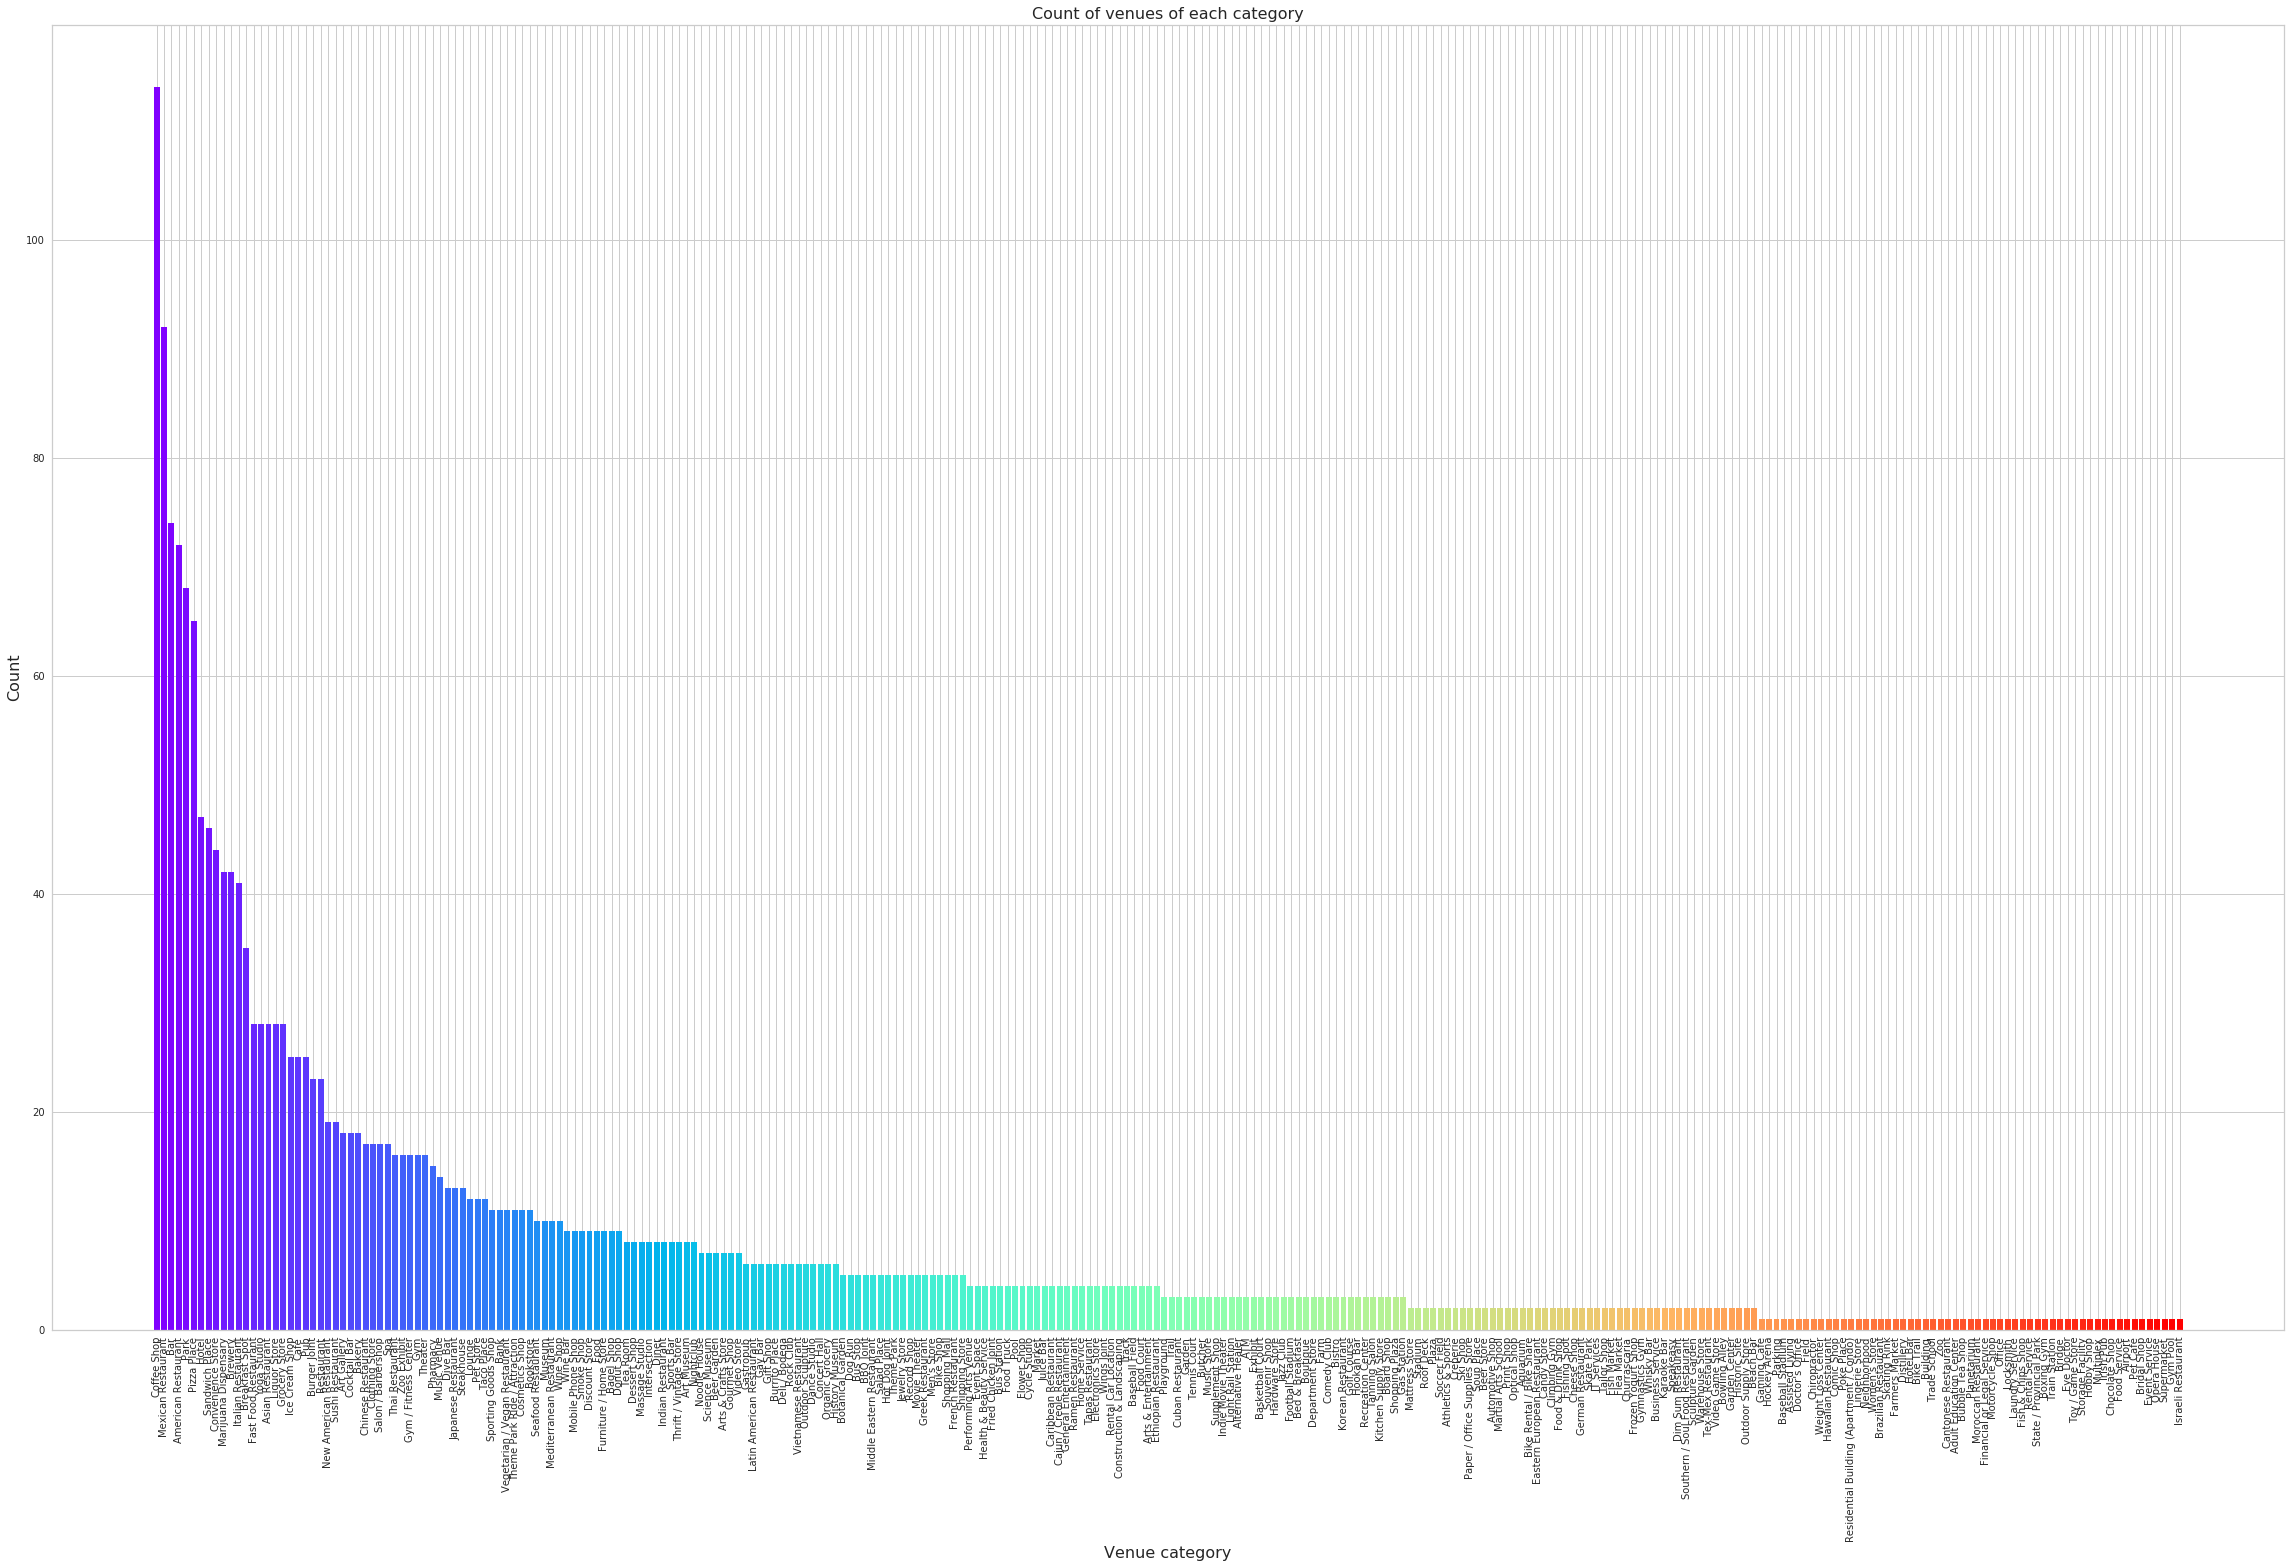

In [193]:
venue_distribution = venues_df['VenueCategory'].value_counts()
colors_var = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (40, 24))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors_var)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [178]:
den_grouped = den_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(den_grouped.shape)
den_grouped

(41, 273)


,Neighborhoods,ATM,Adult Education Center,Airport,Alternative Healer,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,...,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"Alamo Placita, Denver",0.000000,0.000000,0.00,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.00,0.00
1,"Athmar Park, Denver",0.000000,0.000000,0.00,0.000000,0.066667,0.013333,0.000000,0.013333,0.000000,...,0.000000,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.00,0.00
2,"Auraria, Denver",0.000000,0.000000,0.00,0.000000,0.053763,0.000000,0.021505,0.000000,0.010753,...,0.010753,0.010753,0.010753,0.000000,0.010753,0.000000,0.000000,0.000000,0.00,0.00
3,"Baker, Denver",0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
4,"Barnum, Denver",0.000000,0.021277,0.00,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.021277,0.021277,0.000000,0.021277,0.00,0.00
5,"Belcaro, Denver",0.000000,0.000000,0.00,0.000000,0.034091,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.011364,0.00,0.00
6,"Berkeley, Denver",0.000000,0.000000,0.00,0.000000,0.030000,0.000000,0.010000,0.020000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.020000,0.00,0.00
7,"Capitol Hill, Denver",0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
8,"Central Park, Denver",0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
9,"Chaffee Park, Denver",0.000000,0.000000,0.00,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.017241,0.017241,0.000000,0.000000,0.017241,0.00,0.00


In [179]:
len(den_grouped[den_grouped["Brewery"] > 0])

19

In [180]:
den_brewery = den_grouped[["Neighborhoods","Brewery"]]
den_brewery.head()

,Neighborhoods,Brewery
0,"Alamo Placita, Denver",0.033333
1,"Athmar Park, Denver",0.026667
2,"Auraria, Denver",0.010753
3,"Baker, Denver",0.000000
4,"Barnum, Denver",0.000000


### Figure out good cluster number using elbow method

In [154]:
!pip install yellowbrick

     |████████████████████████████████| 266kB 8.6MB/s eta 0:00:01


In [181]:
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer

In [182]:
den_grouped_clustering = den_grouped.drop(["Neighborhoods"], 1)

den_grouped_clustering

,ATM,Adult Education Center,Airport,Alternative Healer,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0.000000,0.000000,0.00,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.00,0.00
1,0.000000,0.000000,0.00,0.000000,0.066667,0.013333,0.000000,0.013333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.00,0.00
2,0.000000,0.000000,0.00,0.000000,0.053763,0.000000,0.021505,0.000000,0.010753,0.000000,...,0.010753,0.010753,0.010753,0.000000,0.010753,0.000000,0.000000,0.000000,0.00,0.00
3,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
4,0.000000,0.021277,0.00,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.021277,0.021277,0.000000,0.021277,0.00,0.00
5,0.000000,0.000000,0.00,0.000000,0.034091,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.011364,0.00,0.00
6,0.000000,0.000000,0.00,0.000000,0.030000,0.000000,0.010000,0.020000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.020000,0.00,0.00
7,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
8,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
9,0.000000,0.000000,0.00,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.017241,0.017241,0.000000,0.000000,0.017241,0.00,0.00


In [183]:
#normalize the data
from sklearn.preprocessing import StandardScaler
X = den_grouped_clustering
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.27610542, -0.15811388, -0.15811388, ..., -0.56997875,
        -0.15811388, -0.15811388],
       [-0.27610542, -0.15811388, -0.15811388, ..., -0.56997875,
        -0.15811388, -0.15811388],
       [-0.27610542, -0.15811388, -0.15811388, ..., -0.56997875,
        -0.15811388, -0.15811388],
       ...,
       [-0.27610542, -0.15811388, -0.15811388, ..., -0.56997875,
        -0.15811388, -0.15811388],
       [-0.27610542, -0.15811388, -0.15811388, ..., -0.56997875,
        -0.15811388, -0.15811388],
       [-0.27610542, -0.15811388, -0.15811388, ...,  1.08775486,
        -0.15811388, -0.15811388]])

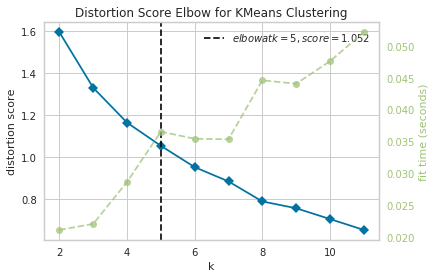

In [184]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

### Cluster neighborhoods

In [185]:
# set number of clusters
kclusters = 5

den_clustering = den_brewery.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(den_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 0, 1, 1, 2, 0, 1, 1, 1], dtype=int32)

In [186]:
# create a new dataframe that includes the cluster
den_merged = den_brewery.copy()

# add clustering labels
den_merged["Cluster Labels"] = kmeans.labels_

In [187]:
den_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
den_merged.head()

,Neighborhood,Brewery,Cluster Labels
0,"Alamo Placita, Denver",0.033333,4
1,"Athmar Park, Denver",0.026667,4
2,"Auraria, Denver",0.010753,0
3,"Baker, Denver",0.000000,1
4,"Barnum, Denver",0.000000,1


In [188]:
# merge to add latitude/longitude for each neighborhood
den_merged = den_merged.join(den_df.set_index("Neighborhood"), on="Neighborhood")

print(den_merged.shape)
den_merged.head() # check the last columns!

(41, 5)


,Neighborhood,Brewery,Cluster Labels,Latitude,Longitude
0,"Alamo Placita, Denver",0.033333,4,39.70396,-105.01039
1,"Athmar Park, Denver",0.026667,4,39.74575,-105.00997
2,"Auraria, Denver",0.010753,0,39.71117,-104.99209
3,"Baker, Denver",0.000000,1,39.71816,-105.03262
4,"Barnum, Denver",0.000000,1,39.70384,-104.94974


In [238]:
# sort the results by Cluster Labels
print(den_merged.shape)
den_merged.sort_values(["Cluster Labels"], inplace=True)
den_merged

(41, 5)


,Neighborhood,Brewery,Cluster Labels,Latitude,Longitude
17,"Cole, Denver",0.022222,0,39.733590,-104.950010
32,"Montclair, Denver",0.020000,0,39.744250,-104.981080
2,"Auraria, Denver",0.010753,0,39.711170,-104.992090
14,"City Park, Denver",0.020000,0,39.735260,-104.990580
13,"City Park West, Denver",0.010000,0,39.743790,-104.948250
6,"Berkeley, Denver",0.020000,0,39.733700,-104.979570
28,"Lincoln Park, Denver",0.010000,0,39.752610,-104.999510
16,"Clayton, Denver",0.022727,0,39.766330,-104.965940
39,"Valverde, Denver",0.000000,1,39.731400,-105.039490
21,"Elyria-Swansea, Denver",0.000000,1,39.781940,-104.985230


### Visualize the clusters

In [227]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(den_merged['Latitude'], den_merged['Longitude'], den_merged['Neighborhood'], den_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [197]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

### Examine the clusters

#### Cluster 0

In [198]:
den_merged.loc[den_merged['Cluster Labels'] == 0]

,Neighborhood,Brewery,Cluster Labels,Latitude,Longitude
2,"Auraria, Denver",0.010753,0,39.71117,-104.99209
6,"Berkeley, Denver",0.020000,0,39.73370,-104.97957
13,"City Park West, Denver",0.010000,0,39.74379,-104.94825
14,"City Park, Denver",0.020000,0,39.73526,-104.99058
16,"Clayton, Denver",0.022727,0,39.76633,-104.96594
17,"Cole, Denver",0.022222,0,39.73359,-104.95001
28,"Lincoln Park, Denver",0.010000,0,39.75261,-104.99951
32,"Montclair, Denver",0.020000,0,39.74425,-104.98108


#### Cluster 1

In [199]:
den_merged.loc[den_merged['Cluster Labels'] == 1]

,Neighborhood,Brewery,Cluster Labels,Latitude,Longitude
3,"Baker, Denver",0.0,1,39.718160,-105.032620
4,"Barnum, Denver",0.0,1,39.703840,-104.949740
7,"Capitol Hill, Denver",0.0,1,39.892390,-104.951710
8,"Central Park, Denver",0.0,1,39.787410,-105.017560
9,"Chaffee Park, Denver",0.0,1,39.729110,-104.968170
10,"Cheesman Park, Denver",0.0,1,39.717820,-104.948730
11,"Cherry Creek, Denver",0.0,1,39.863790,-104.977880
15,"Civic Center, Denver (neighborhood)",0.0,1,39.766930,-104.950510
18,"Congress Park, Denver",0.0,1,39.721960,-104.965520
19,"Country Club, Denver",0.0,1,39.740010,-104.992020


#### Cluster 2

In [200]:
den_merged.loc[den_merged['Cluster Labels'] == 2]

,Neighborhood,Brewery,Cluster Labels,Latitude,Longitude
5,"Belcaro, Denver",0.056818,2,39.77666,-105.03957
26,"Hilltop, Denver",0.050000,2,39.75121,-105.02135
27,"Jefferson Park, Denver",0.054545,2,39.72896,-105.00222
34,"Ruby Hill, Denver",0.050000,2,39.75256,-105.03813


#### Cluster 3

In [202]:
den_merged.loc[den_merged['Cluster Labels'] == 3]

,Neighborhood,Brewery,Cluster Labels,Latitude,Longitude
37,"Sun Valley, Denver",0.088889,3,39.77495,-105.00644


#### Cluster 4

In [203]:
den_merged.loc[den_merged['Cluster Labels'] == 4]

,Neighborhood,Brewery,Cluster Labels,Latitude,Longitude
0,"Alamo Placita, Denver",0.033333,4,39.70396,-105.01039
1,"Athmar Park, Denver",0.026667,4,39.74575,-105.00997
12,"Chinatown, Denver",0.040000,4,39.74545,-104.96720
24,"Hampden South, Denver",0.040000,4,39.76442,-105.01198
35,Sloan Lake (Colorado),0.030000,4,39.71933,-104.98000
40,"West Colfax, Denver",0.031250,4,39.75634,-104.96595


### Compare neighborhoods with other competing businesses, including bars

In [206]:
den_drinks = den_grouped[["Neighborhoods","Brewery", "Bar", "Pub", "Cocktail Bar", "Wine Bar"]]
den_drinks.head()

,Neighborhoods,Brewery,Bar,Pub,Cocktail Bar,Wine Bar
0,"Alamo Placita, Denver",0.033333,0.000000,0.000000,0.000000,0.000000
1,"Athmar Park, Denver",0.026667,0.013333,0.000000,0.026667,0.013333
2,"Auraria, Denver",0.010753,0.075269,0.010753,0.000000,0.000000
3,"Baker, Denver",0.000000,0.000000,0.000000,0.000000,0.000000
4,"Barnum, Denver",0.000000,0.021277,0.000000,0.000000,0.000000


In [230]:
# cluster the neighborhoods using the five venue categories
den_clustering_drinks = den_drinks.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans_drinks = KMeans(n_clusters=kclusters, random_state=0).fit(den_clustering_drinks)

# check cluster labels generated for each row in the dataframe
kmeans_drinks.labels_[0:10]

array([0, 3, 4, 0, 0, 3, 1, 2, 1, 4], dtype=int32)

In [231]:
# create a new dataframe that includes the cluster
den_merged_drinks = den_drinks.copy()

# add clustering labels
den_merged_drinks["Cluster Labels"] = kmeans_drinks.labels_

In [232]:
den_merged_drinks.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
den_merged_drinks.head()

,Neighborhood,Brewery,Bar,Pub,Cocktail Bar,Wine Bar,Cluster Labels
0,"Alamo Placita, Denver",0.033333,0.000000,0.000000,0.000000,0.000000,0
1,"Athmar Park, Denver",0.026667,0.013333,0.000000,0.026667,0.013333,3
2,"Auraria, Denver",0.010753,0.075269,0.010753,0.000000,0.000000,4
3,"Baker, Denver",0.000000,0.000000,0.000000,0.000000,0.000000,0
4,"Barnum, Denver",0.000000,0.021277,0.000000,0.000000,0.000000,0


In [233]:
# merge to add latitude/longitude for each neighborhood
den_merged_drinks = den_merged_drinks.join(den_df.set_index("Neighborhood"), on="Neighborhood")

print(den_merged_drinks.shape)
den_merged_drinks.head() # check the last columns!

(41, 9)


,Neighborhood,Brewery,Bar,Pub,Cocktail Bar,Wine Bar,Cluster Labels,Latitude,Longitude
0,"Alamo Placita, Denver",0.033333,0.000000,0.000000,0.000000,0.000000,0,39.70396,-105.01039
1,"Athmar Park, Denver",0.026667,0.013333,0.000000,0.026667,0.013333,3,39.74575,-105.00997
2,"Auraria, Denver",0.010753,0.075269,0.010753,0.000000,0.000000,4,39.71117,-104.99209
3,"Baker, Denver",0.000000,0.000000,0.000000,0.000000,0.000000,0,39.71816,-105.03262
4,"Barnum, Denver",0.000000,0.021277,0.000000,0.000000,0.000000,0,39.70384,-104.94974


In [234]:
# sort the results by Cluster Labels
print(den_merged_drinks.shape)
den_merged_drinks.sort_values(["Cluster Labels"], inplace=True)
den_merged_drinks

(41, 9)


,Neighborhood,Brewery,Bar,Pub,Cocktail Bar,Wine Bar,Cluster Labels,Latitude,Longitude
0,"Alamo Placita, Denver",0.033333,0.000000,0.000000,0.000000,0.000000,0,39.703960,-105.010390
36,"Speer, Denver",0.000000,0.000000,0.000000,0.000000,0.000000,0,24.260840,55.625760
33,"North Capitol Hill, Denver",0.000000,0.000000,0.000000,0.000000,0.000000,0,34.986120,-79.585330
31,"Montbello, Denver",0.000000,0.000000,0.000000,0.000000,0.000000,0,39.731660,-104.913370
30,"Lowry, Denver",0.000000,0.000000,0.000000,0.000000,0.000000,0,39.793210,-104.833860
29,"LoDo, Denver",0.000000,0.025641,0.000000,0.000000,0.000000,0,39.716238,-104.908083
25,"Highland, Denver",0.000000,0.000000,0.000000,0.000000,0.000000,0,39.718610,-104.924600
23,"Hale, Denver",0.000000,0.000000,0.000000,0.000000,0.000000,0,39.645260,-104.895220
39,"Valverde, Denver",0.000000,0.000000,0.000000,0.000000,0.000000,0,39.731400,-105.039490
18,"Congress Park, Denver",0.000000,0.000000,0.000000,0.000000,0.000000,0,39.721960,-104.965520


### Visualize the clusters

In [237]:
kclusters_drinks=5

In [250]:
# create map
map_clusters_drinks = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lon, poi, cluster in zip(den_merged_drinks['Latitude'], den_merged_drinks['Longitude'], den_merged_drinks['Neighborhood'], den_merged_drinks['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_drinks)
       
map_clusters_drinks

### Examine the clusters

#### Cluster 0: Very low number of any drinking establishments

In [229]:
den_merged_drinks.loc[den_merged_drinks['Cluster Labels'] == 0]

,Neighborhood,Brewery,Bar,Pub,Cocktail Bar,Wine Bar,Cluster Labels,Latitude,Longitude
0,"Alamo Placita, Denver",0.033333,0.000000,0.000000,0.0,0.0,0,39.703960,-105.010390
36,"Speer, Denver",0.000000,0.000000,0.000000,0.0,0.0,0,24.260840,55.625760
33,"North Capitol Hill, Denver",0.000000,0.000000,0.000000,0.0,0.0,0,34.986120,-79.585330
31,"Montbello, Denver",0.000000,0.000000,0.000000,0.0,0.0,0,39.731660,-104.913370
30,"Lowry, Denver",0.000000,0.000000,0.000000,0.0,0.0,0,39.793210,-104.833860
29,"LoDo, Denver",0.000000,0.025641,0.000000,0.0,0.0,0,39.716238,-104.908083
25,"Highland, Denver",0.000000,0.000000,0.000000,0.0,0.0,0,39.718610,-104.924600
23,"Hale, Denver",0.000000,0.000000,0.000000,0.0,0.0,0,39.645260,-104.895220
39,"Valverde, Denver",0.000000,0.000000,0.000000,0.0,0.0,0,39.731400,-105.039490
18,"Congress Park, Denver",0.000000,0.000000,0.000000,0.0,0.0,0,39.721960,-104.965520


#### Cluster 1:  Low to medium number of any drinking establishments

In [254]:
den_merged_drinks.loc[den_merged_drinks['Cluster Labels'] == 1]

,Neighborhood,Brewery,Bar,Pub,Cocktail Bar,Wine Bar,Cluster Labels,Latitude,Longitude
6,"Berkeley, Denver",0.020000,0.030000,0.040000,0.01,0.020000,1,39.73370,-104.97957
32,"Montclair, Denver",0.020000,0.040000,0.030000,0.01,0.000000,1,39.74425,-104.98108
22,"Globeville, Denver",0.000000,0.048387,0.032258,0.00,0.000000,1,39.73271,-104.93042
28,"Lincoln Park, Denver",0.010000,0.040000,0.010000,0.04,0.010000,1,39.75261,-104.99951
12,"Chinatown, Denver",0.040000,0.030000,0.030000,0.00,0.000000,1,39.74545,-104.96720
38,"Union Station, Denver",0.000000,0.043478,0.000000,0.00,0.000000,1,39.67850,-104.96662
16,"Clayton, Denver",0.022727,0.022727,0.022727,0.00,0.022727,1,39.76633,-104.96594
14,"City Park, Denver",0.020000,0.030000,0.020000,0.01,0.000000,1,39.73526,-104.99058
13,"City Park West, Denver",0.010000,0.050000,0.000000,0.01,0.000000,1,39.74379,-104.94825
19,"Country Club, Denver",0.000000,0.030000,0.020000,0.02,0.000000,1,39.74001,-104.99202


#### Cluster 2: 

In [255]:
den_merged_drinks.loc[den_merged_drinks['Cluster Labels'] == 2]

,Neighborhood,Brewery,Bar,Pub,Cocktail Bar,Wine Bar,Cluster Labels,Latitude,Longitude
7,"Capitol Hill, Denver",0.0,0.0,0.076923,0.0,0.0,2,39.89239,-104.95171


#### Cluster 3: Medium to high number of breweries

In [256]:
den_merged_drinks.loc[den_merged_drinks['Cluster Labels'] == 3]

,Neighborhood,Brewery,Bar,Pub,Cocktail Bar,Wine Bar,Cluster Labels,Latitude,Longitude
1,"Athmar Park, Denver",0.026667,0.013333,0.00,0.026667,0.013333,3,39.74575,-105.00997
37,"Sun Valley, Denver",0.088889,0.044444,0.00,0.000000,0.000000,3,39.77495,-105.00644
26,"Hilltop, Denver",0.050000,0.033333,0.00,0.016667,0.000000,3,39.75121,-105.02135
27,"Jefferson Park, Denver",0.054545,0.018182,0.00,0.000000,0.000000,3,39.72896,-105.00222
24,"Hampden South, Denver",0.040000,0.040000,0.01,0.040000,0.010000,3,39.76442,-105.01198
5,"Belcaro, Denver",0.056818,0.034091,0.00,0.011364,0.011364,3,39.77666,-105.03957


#### Cluster 4: Low to medium number of breweries; medium to high number of bars

In [257]:
den_merged_drinks.loc[den_merged_drinks['Cluster Labels'] == 4]

,Neighborhood,Brewery,Bar,Pub,Cocktail Bar,Wine Bar,Cluster Labels,Latitude,Longitude
2,"Auraria, Denver",0.010753,0.075269,0.010753,0.0,0.000000,4,39.71117,-104.99209
34,"Ruby Hill, Denver",0.050000,0.100000,0.000000,0.0,0.000000,4,39.75256,-105.03813
35,Sloan Lake (Colorado),0.030000,0.060000,0.010000,0.0,0.010000,4,39.71933,-104.98000
21,"Elyria-Swansea, Denver",0.000000,0.095238,0.000000,0.0,0.000000,4,39.78194,-104.98523
9,"Chaffee Park, Denver",0.000000,0.068966,0.017241,0.0,0.017241,4,39.72911,-104.96817
17,"Cole, Denver",0.022222,0.066667,0.022222,0.0,0.000000,4,39.73359,-104.95001
40,"West Colfax, Denver",0.031250,0.062500,0.000000,0.0,0.000000,4,39.75634,-104.96595


Cluster 4 appears to contain the best opportunities for a new brewery.  These neighborhoods appear to have an existing nightlife environment, but few existing breweries that would directly compete with our proposed business.